In [1]:
from utils import *

# Linear Regression

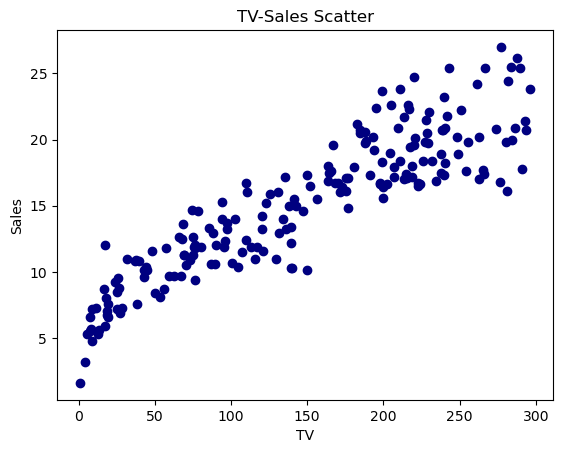

In [2]:
# load data
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising = advertising[['TV', 'Sales']]
advertising.head(10)

X = advertising['TV']
y = advertising['Sales']

plt.scatter(X, y, c = 'navy')
plt.xlabel('TV')  
plt.ylabel('Sales')  
plt.title('TV-Sales Scatter')
plt.show()

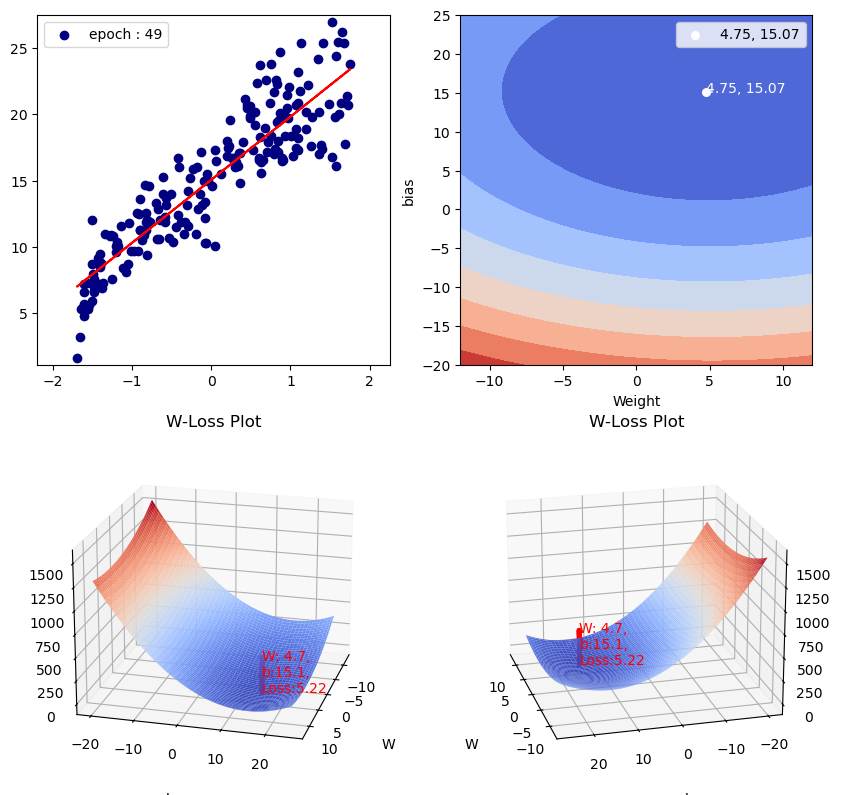

In [3]:
_FILL_ = None

################# initialize hyperparams ######################

W = -1
b = 5
learning_rate = 1e-1
epochs = 50
tol = 1e-3
time_sleep = 0.2

################################################################

X = (X-X.mean()+1)/np.std(X)
W_mesh, b_mesh, loss_out = mesh_loss_out_generator(X,y, (-12,12), (-20,25), 100)

loss_list = []
W_list = []
b_list = []
for epoch in range(epochs): 
    y_pred = W*X + b

    # MSE loss fucntion
    loss = ((y_pred - y) ** 2).mean()

    # compute gradient
    W_grad = (2 * (y_pred - y) * X).mean()
    b_grad = (2 * (y_pred - y)).mean()
    
    # parameter update
    W = W - learning_rate * W_grad
    b = b - learning_rate * b_grad

    # Plotting
    fig = plt.figure(figsize = (10,10))

    ax = fig.add_subplot(221)
    data_fitted_visualizer(X, y, y_pred, epoch)

    ax = fig.add_subplot(222)
    contour_2d(W, b, W_mesh, b_mesh, loss_out, ax, cmap_color=plt.cm.coolwarm, x_label = 'Weight', y_label = 'bias')
    
    ax = fig.add_subplot(223, projection='3d')
    loss_func_visualizer_3d(W, b, W_mesh, b_mesh, loss_out, X, y, ax, angle = (20,15))
    
    ax = fig.add_subplot(224, projection='3d')
    loss_func_visualizer_3d(W, b, W_mesh, b_mesh, loss_out, X, y, ax, angle = (20,165), clear =True)

    time.sleep(time_sleep)

    loss_list.append(loss)
    W_list.append(W)
    b_list.append(b)
    
    if loss < tol: 
        break




In [4]:
for l, w, b in zip(loss_list, W_list, b_list):
    print(f"loss:{l:.4f} , W:{w:.4f}, b:{b:.4f}")

loss:141.1436 , W:0.1737, b:7.0284
loss:91.7707 , W:1.1079, b:8.6484
loss:60.3323 , W:1.8514, b:9.9423
loss:40.3134 , W:2.4432, b:10.9756
loss:27.5661 , W:2.9142, b:11.8009
loss:19.4489 , W:3.2890, b:12.4600
loss:14.2801 , W:3.5874, b:12.9864
loss:10.9887 , W:3.8248, b:13.4068
loss:8.8927 , W:4.0137, b:13.7426
loss:7.5580 , W:4.1641, b:14.0108
loss:6.7081 , W:4.2838, b:14.2251
loss:6.1668 , W:4.3790, b:14.3961
loss:5.8221 , W:4.4548, b:14.5328
loss:5.6027 , W:4.5151, b:14.6419
loss:5.4629 , W:4.5631, b:14.7291
loss:5.3739 , W:4.6013, b:14.7987
loss:5.3172 , W:4.6317, b:14.8543
loss:5.2811 , W:4.6558, b:14.8987
loss:5.2581 , W:4.6751, b:14.9342
loss:5.2434 , W:4.6904, b:14.9626
loss:5.2341 , W:4.7026, b:14.9852
loss:5.2282 , W:4.7123, b:15.0033
loss:5.2244 , W:4.7200, b:15.0177
loss:5.2220 , W:4.7261, b:15.0292
loss:5.2204 , W:4.7310, b:15.0385
loss:5.2195 , W:4.7349, b:15.0458
loss:5.2188 , W:4.7380, b:15.0517
loss:5.2184 , W:4.7404, b:15.0564
loss:5.2182 , W:4.7424, b:15.0601
loss:5.2

In [5]:
def linear_regression_model(W=-1, b=5, lr=0.5):
    epochs = 50
    tol = 1e-3
    
    loss_list = []
    W_list = []
    b_list = []
    for epoch in range(epochs): 
        y_pred = W*X + b
    
        # MSE loss fucntion
        loss = ((y_pred - y) ** 2).mean()
    
        # compute gradient
        W_grad = (2 * (y_pred - y) * X).mean()
        b_grad = (2 * (y_pred - y)).mean()
        
        # parameter update
        W = W - lr * W_grad
        b = b - lr * b_grad

        loss_list.append(loss)
        W_list.append(W)
        b_list.append(b)
        
        if loss < tol: 
            break
    
    return loss_list 

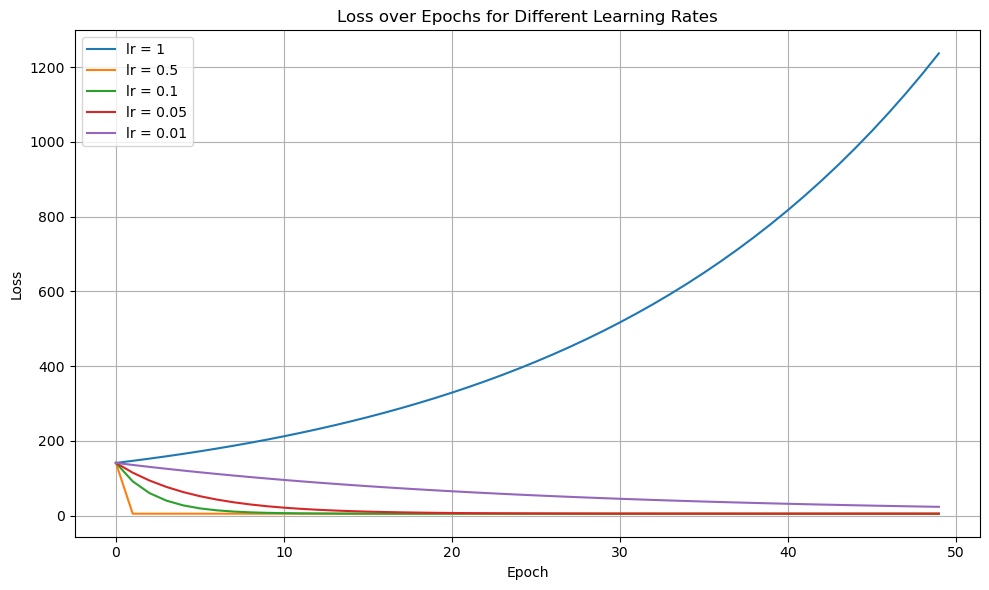

In [6]:
lr_list = [1, 0.5, 1e-1, 5e-2, 1e-2]

plt.figure(figsize=(10, 6))

for lr in lr_list:
    loss_list = linear_regression_model(lr=lr)
    plt.plot(loss_list, label=f"lr = {lr}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
W_list = [-1e2, -10, -1, 1, 10, 1e2]
b_list = [-5e2, -50, -5, 5, 50, 5e2]

results = []

for W in W_list:
    for b in b_list:
        result = linear_regression_model(W, b, lr=0.5)[-1]
        results.append([W, b, result])

df = pd.DataFrame(results, columns=["W", "b", "value"])

pivot_table = df.pivot(index="b", columns="W", values="value")
pivot_table = pivot_table.sort_index(axis=0).sort_index(axis=1)

print(pivot_table)

W         -100.0    -10.0     -1.0       1.0       10.0      100.0
b                                                                 
-500.0  5.217744  5.217744  5.217744  5.217744  5.217744  5.217744
-50.0   5.217744  5.217744  5.217744  5.217744  5.217744  5.217744
-5.0    5.217744  5.217744  5.217744  5.217744  5.217744  5.217744
 5.0    5.217744  5.217744  5.217744  5.217744  5.217744  5.217744
 50.0   5.217744  5.217744  5.217744  5.217744  5.217744  5.217744
 500.0  5.217744  5.217744  5.217744  5.217744  5.217744  5.217744
